In [40]:
# import tensorflow
# from tensorflow.keras.utils import to_categorical
# from keras_preprocessing.image import load_img
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# import os
# import pandas as pd
# import numpy as np
# import torch


In [41]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd
import torch
import os

In [42]:
TRAIN_DIR = 'archive/train'
TEST_DIR = 'archive/test'

In [43]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [44]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [45]:
print(train)

                                              image     label
0         archive/train\angry\Training_10118481.jpg     angry
1         archive/train\angry\Training_10120469.jpg     angry
2         archive/train\angry\Training_10131352.jpg     angry
3         archive/train\angry\Training_10161559.jpg     angry
4          archive/train\angry\Training_1021836.jpg     angry
...                                             ...       ...
28704  archive/train\surprise\Training_99916297.jpg  surprise
28705  archive/train\surprise\Training_99924420.jpg  surprise
28706  archive/train\surprise\Training_99937001.jpg  surprise
28707  archive/train\surprise\Training_99951755.jpg  surprise
28708  archive/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [46]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [47]:
print(test)
print(test['image'])

                                              image     label
0       archive/test\angry\PrivateTest_10131363.jpg     angry
1       archive/test\angry\PrivateTest_10304478.jpg     angry
2        archive/test\angry\PrivateTest_1054527.jpg     angry
3       archive/test\angry\PrivateTest_10590091.jpg     angry
4        archive/test\angry\PrivateTest_1109992.jpg     angry
...                                             ...       ...
7173  archive/test\surprise\PublicTest_98089595.jpg  surprise
7174  archive/test\surprise\PublicTest_98567249.jpg  surprise
7175  archive/test\surprise\PublicTest_98972870.jpg  surprise
7176  archive/test\surprise\PublicTest_99242645.jpg  surprise
7177  archive/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         archive/test\angry\PrivateTest_10131363.jpg
1         archive/test\angry\PrivateTest_10304478.jpg
2          archive/test\angry\PrivateTest_1054527.jpg
3         archive/test\angry\PrivateTest_10590091.jpg
4          arch

In [48]:
from tqdm.notebook import tqdm

In [49]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [50]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

c:\Users\deepa\anaconda3\envs\dplrn\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [51]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [52]:
x_train = train_features/255.0
x_test = test_features/255.0

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [55]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [56]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [57]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    # Classification head
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    # Classification head
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_13 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                      

In [59]:
print("CUDA Available:", torch.cuda.is_available())
print("Device Count:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA Available: True
Device Count: 1
Current GPU: NVIDIA GeForce RTX 2070 SUPER


In [60]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)   # Moves model to GPU if available

In [61]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test)
)


Epoch 1/100
225/225 [==============================] - 12s 46ms/step - loss: 2.0514 - accuracy: 0.3062 - val_loss: 2.0969 - val_accuracy: 0.2476
Epoch 2/100
225/225 [==============================] - 9s 42ms/step - loss: 1.5364 - accuracy: 0.4324 - val_loss: 1.6945 - val_accuracy: 0.2823
Epoch 3/100
225/225 [==============================] - 9s 42ms/step - loss: 1.3455 - accuracy: 0.5003 - val_loss: 1.2736 - val_accuracy: 0.5130
Epoch 4/100
225/225 [==============================] - 10s 42ms/step - loss: 1.2264 - accuracy: 0.5387 - val_loss: 1.1885 - val_accuracy: 0.5408
Epoch 5/100
225/225 [==============================] - 10s 42ms/step - loss: 1.1459 - accuracy: 0.5646 - val_loss: 1.1635 - val_accuracy: 0.5575
Epoch 6/100
225/225 [==============================] - 10s 42ms/step - loss: 1.0876 - accuracy: 0.5902 - val_loss: 1.1670 - val_accuracy: 0.5508
Epoch 7/100
225/225 [==============================] - 10s 42ms/step - loss: 1.0390 - accuracy: 0.6080 - val_loss: 1.1314 - val_accu

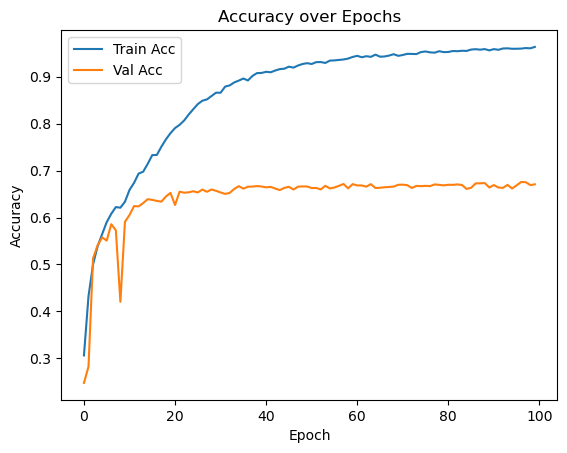

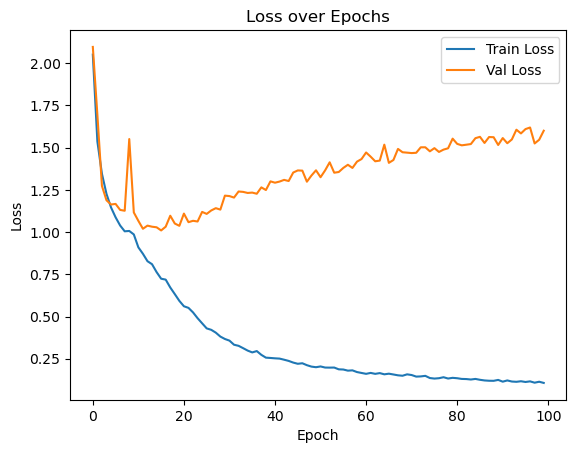

In [62]:
# 1) Plot training history
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# 2) Confusion matrix on test set
from sklearn.metrics import confusion_matrix, classification_report
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)

print('\nClassification Report:')
print(classification_report(
    y_true, y_pred,
    target_names=['angry','disgust','fear','happy','neutral','sad','surprise']
))

225/225 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[ 588    2   69   59   96  121   23]
 [  27   65    4    4    2    7    2]
 [ 129    2  472   40  103  192   86]
 [  35    0   20 1551   88   42   38]
 [ 102    0   64  102  771  174   20]
 [ 148    1  113   71  219  677   18]
 [  21    0   55   29   20   16  690]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.61      0.59       958
     disgust       0.93      0.59      0.72       111
        fear       0.59      0.46      0.52      1024
       happy       0.84      0.87      0.85      1774
     neutral       0.59      0.63      0.61      1233
         sad       0.55      0.54      0.55      1247
    surprise       0.79      0.83      0.81       831

    accuracy                           0.67      7178
   macro avg       0.69      0.65      0.66      7178
weighted avg       0.67      0.67      0.67      7178



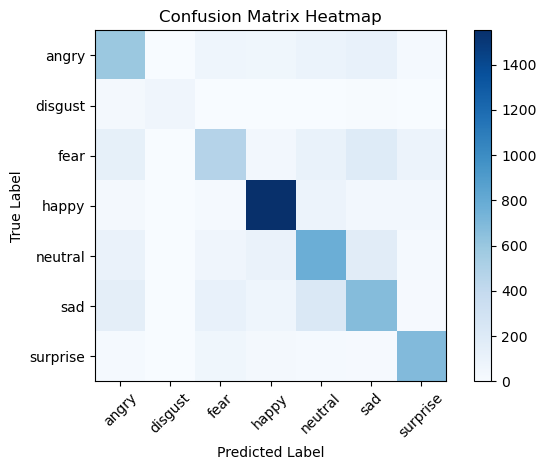

In [64]:
# 3) Plot confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Heatmap')
plt.colorbar()
ticks = np.arange(len(cm))
plt.xticks(ticks, ['angry','disgust','fear','happy','neutral','sad','surprise'], rotation=45)
plt.yticks(ticks, ['angry','disgust','fear','happy','neutral','sad','surprise'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

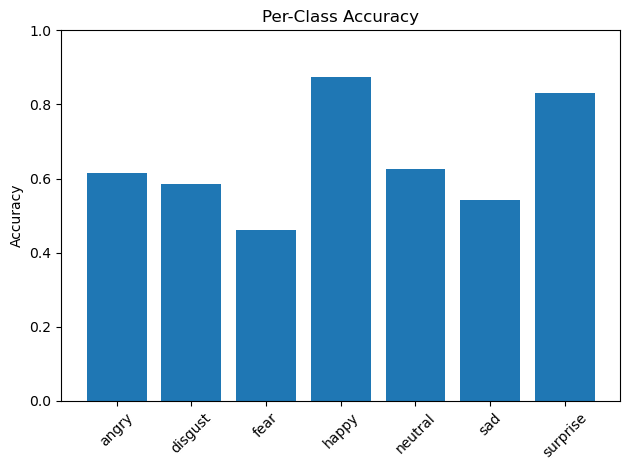

In [65]:
# 4) Per-class accuracy bar chart
class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure()
plt.bar(ticks, class_acc)
plt.xticks(ticks, ['angry','disgust','fear','happy','neutral','sad','surprise'], rotation=45)
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [66]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [67]:
from keras.models import model_from_json

In [68]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [69]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [70]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [71]:
image = 'archive/test/angry/PrivateTest_8276334.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


c:\Users\deepa\anaconda3\envs\dplrn\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 198ms/step
model prediction is  sad


In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 [==============================] - 0s 20ms/step
model prediction is  happy


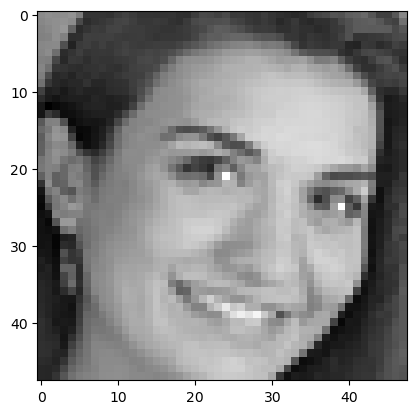

In [73]:
image = 'archive/train/happy/Training_87867.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 17ms/step
model prediction is  fear


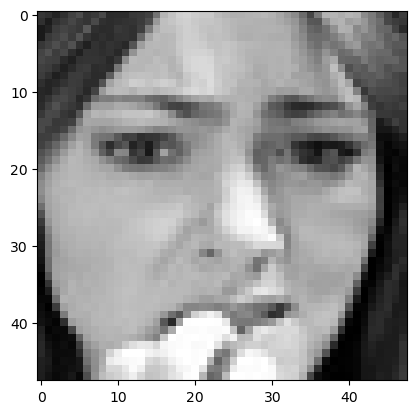

In [74]:
image = 'archive/train/fear/Training_303571.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 18ms/step
model prediction is  disgust


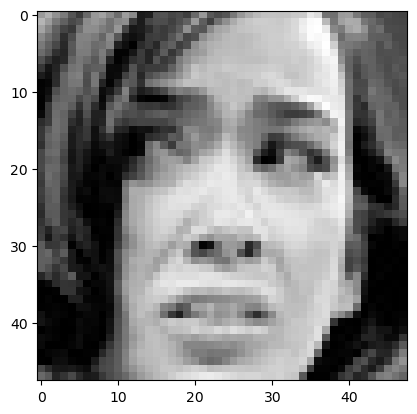

In [75]:
image = 'archive/train/disgust/Training_659019.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 20ms/step
model prediction is  happy


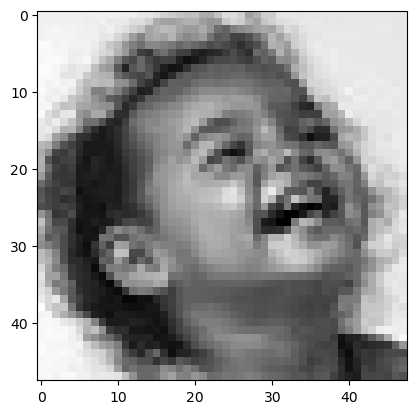

In [76]:
image = 'archive/train/happy/Training_184621.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 16ms/step
model prediction is  surprise


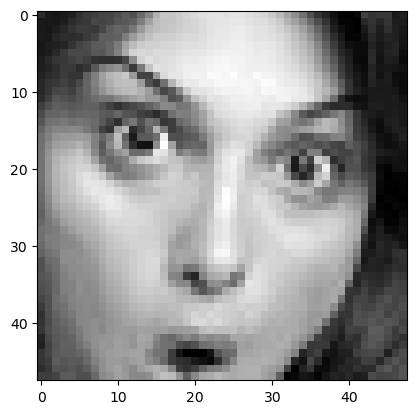

In [77]:
image = 'archive/train/surprise/Training_8796.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')